In [ ]:
ord('1') - ord('0')

In [ ]:
def my_int( s ):
    num = 0
    for ch in s:
        num = num*10 + ord(ch) - ord('0') # 점화식
    return num

# 1234 => 1*1000 + 2*100 + 3*10 + 4*1
s = "1234"
my_int(s)

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2

# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (-2.0, 2.0)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.0)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

In [ ]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

                                       # x1.shape = (None,784) , W1.shape = (784,100) , b1.shape = (100,)
                                       # x2.shape = (None,100) , W2.shape = (100,100) , b2.shape = (100,)
                                       # x3.shape = (None,100) , W3.shape = (100,100) , b3.shape = (100,)
                                       # x4.shape = (None,100) , W4.shape = (100,100) , b4.shape = (100,)
                                       # 출력층 : x5.shape = (None,100), W5.shape = (100,10), b5.shape=(10,)
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [ ]:
import numpy as np
a = np.random.randn(100000)
print(a)
print(np.mean(a))
print(np.std(a))

In [ ]:
import numpy as np
a = np.random.randn(1000,1000)
print(np.mean(a))
print(np.std(a))

In [ ]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)  # (1000,100)(100,100)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 배치 정규화 테스트

In [ ]:
x1 = np.array([1000, 3000, 2000, 5000, 7000])
print(x1)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(out)

In [ ]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
# out = x1
print(np.mean(out))
print(np.std(out))

In [ ]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))
gamma = 2
beta = 3
y = out*gamma + beta
print(np.mean(y))
print(np.std(y))

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

In [14]:
a = np.logspace(0, 4, num=5, base=2)
a

array([ 1.,  2.,  4.,  8., 16.])

In [15]:
a = np.logspace(0, -4, num=5, base=2)
a

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [16]:
a = np.logspace(0, 4, num=5, base=10)
a

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [17]:
a = np.logspace(0, -4, num=5, base=10)
a

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])

In [20]:
np.logspace(0, -4, num=16)   #  간격 : abs(-4-0)/(num-1)

array([1.00000000e+00, 5.41169527e-01, 2.92864456e-01, 1.58489319e-01,
       8.57695899e-02, 4.64158883e-02, 2.51188643e-02, 1.35935639e-02,
       7.35642254e-03, 3.98107171e-03, 2.15443469e-03, 1.16591440e-03,
       6.30957344e-04, 3.41454887e-04, 1.84784980e-04, 1.00000000e-04])

============== 1/16 ==============
epoch:0 | 0.116 - 0.12
epoch:1 | 0.097 - 0.121


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.155
epoch:3 | 0.097 - 0.168
epoch:4 | 0.097 - 0.185
epoch:5 | 0.097 - 0.19
epoch:6 | 0.097 - 0.207
epoch:7 | 0.097 - 0.227
epoch:8 | 0.097 - 0.249
epoch:9 | 0.097 - 0.249
epoch:10 | 0.097 - 0.277
epoch:11 | 0.097 - 0.293
epoch:12 | 0.097 - 0.319
epoch:13 | 0.097 - 0.34
epoch:14 | 0.097 - 0.352
epoch:15 | 0.097 - 0.353
epoch:16 | 0.097 - 0.374
epoch:17 | 0.097 - 0.39


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.408
epoch:19 | 0.097 - 0.416
============== 2/16 ==============
epoch:0 | 0.097 - 0.084


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.083
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.182
epoch:5 | 0.097 - 0.212
epoch:6 | 0.097 - 0.241
epoch:7 | 0.097 - 0.248
epoch:8 | 0.097 - 0.283
epoch:9 | 0.097 - 0.302
epoch:10 | 0.097 - 0.318
epoch:11 | 0.097 - 0.354
epoch:12 | 0.097 - 0.371
epoch:13 | 0.097 - 0.38
epoch:14 | 0.097 - 0.406
epoch:15 | 0.097 - 0.419
epoch:16 | 0.097 - 0.441
epoch:17 | 0.097 - 0.45
epoch:18 | 0.097 - 0.462


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.482
============== 3/16 ==============
epoch:0 | 0.113 - 0.107
epoch:1 | 0.337 - 0.097
epoch:2 | 0.493 - 0.113
epoch:3 | 0.576 - 0.151
epoch:4 | 0.677 - 0.195
epoch:5 | 0.716 - 0.24
epoch:6 | 0.754 - 0.285
epoch:7 | 0.796 - 0.343
epoch:8 | 0.843 - 0.376
epoch:9 | 0.855 - 0.409
epoch:10 | 0.888 - 0.431
epoch:11 | 0.904 - 0.468
epoch:12 | 0.912 - 0.494
epoch:13 | 0.925 - 0.521
epoch:14 | 0.945 - 0.542
epoch:15 | 0.95 - 0.563
epoch:16 | 0.954 - 0.58
epoch:17 | 0.967 - 0.6


No handles with labels found to put in legend.


epoch:18 | 0.968 - 0.615
epoch:19 | 0.974 - 0.633
============== 4/16 ==============
epoch:0 | 0.112 - 0.104
epoch:1 | 0.238 - 0.16
epoch:2 | 0.402 - 0.244
epoch:3 | 0.474 - 0.321
epoch:4 | 0.556 - 0.389
epoch:5 | 0.612 - 0.434
epoch:6 | 0.632 - 0.485
epoch:7 | 0.661 - 0.529
epoch:8 | 0.701 - 0.558
epoch:9 | 0.707 - 0.613
epoch:10 | 0.736 - 0.639
epoch:11 | 0.75 - 0.664
epoch:12 | 0.764 - 0.687
epoch:13 | 0.779 - 0.708
epoch:14 | 0.788 - 0.723
epoch:15 | 0.798 - 0.745
epoch:16 | 0.808 - 0.758
epoch:17 | 0.824 - 0.769


No handles with labels found to put in legend.


epoch:18 | 0.827 - 0.778
epoch:19 | 0.84 - 0.787
============== 5/16 ==============
epoch:0 | 0.078 - 0.085
epoch:1 | 0.079 - 0.09
epoch:2 | 0.086 - 0.212
epoch:3 | 0.092 - 0.348
epoch:4 | 0.107 - 0.473
epoch:5 | 0.112 - 0.556
epoch:6 | 0.123 - 0.621
epoch:7 | 0.137 - 0.652
epoch:8 | 0.147 - 0.678
epoch:9 | 0.157 - 0.718
epoch:10 | 0.172 - 0.746
epoch:11 | 0.183 - 0.771
epoch:12 | 0.195 - 0.788
epoch:13 | 0.22 - 0.801
epoch:14 | 0.228 - 0.819
epoch:15 | 0.241 - 0.838
epoch:16 | 0.27 - 0.85
epoch:17 | 0.289 - 0.859


No handles with labels found to put in legend.


epoch:18 | 0.3 - 0.865
epoch:19 | 0.317 - 0.878
============== 6/16 ==============
epoch:0 | 0.099 - 0.108
epoch:1 | 0.134 - 0.203
epoch:2 | 0.136 - 0.489
epoch:3 | 0.135 - 0.663
epoch:4 | 0.12 - 0.724
epoch:5 | 0.116 - 0.771
epoch:6 | 0.116 - 0.791
epoch:7 | 0.119 - 0.807
epoch:8 | 0.136 - 0.829
epoch:9 | 0.141 - 0.849
epoch:10 | 0.12 - 0.863
epoch:11 | 0.117 - 0.874
epoch:12 | 0.129 - 0.892
epoch:13 | 0.139 - 0.911
epoch:14 | 0.16 - 0.912
epoch:15 | 0.119 - 0.921
epoch:16 | 0.152 - 0.928
epoch:17 | 0.16 - 0.93
epoch:18 | 0.121 - 0.942


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.948
============== 7/16 ==============
epoch:0 | 0.117 - 0.074
epoch:1 | 0.116 - 0.253
epoch:2 | 0.116 - 0.53
epoch:3 | 0.116 - 0.64
epoch:4 | 0.117 - 0.711
epoch:5 | 0.117 - 0.761
epoch:6 | 0.117 - 0.8
epoch:7 | 0.117 - 0.833
epoch:8 | 0.117 - 0.848
epoch:9 | 0.117 - 0.876
epoch:10 | 0.117 - 0.905
epoch:11 | 0.117 - 0.922
epoch:12 | 0.117 - 0.934
epoch:13 | 0.117 - 0.945
epoch:14 | 0.117 - 0.955
epoch:15 | 0.117 - 0.969
epoch:16 | 0.117 - 0.975
epoch:17 | 0.117 - 0.98


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.984
epoch:19 | 0.117 - 0.988
============== 8/16 ==============
epoch:0 | 0.116 - 0.096
epoch:1 | 0.116 - 0.263
epoch:2 | 0.117 - 0.603
epoch:3 | 0.117 - 0.69
epoch:4 | 0.117 - 0.731
epoch:5 | 0.117 - 0.782
epoch:6 | 0.117 - 0.826
epoch:7 | 0.117 - 0.86
epoch:8 | 0.117 - 0.915
epoch:9 | 0.117 - 0.935
epoch:10 | 0.117 - 0.954
epoch:11 | 0.117 - 0.969
epoch:12 | 0.116 - 0.982
epoch:13 | 0.116 - 0.988
epoch:14 | 0.116 - 0.991
epoch:15 | 0.116 - 0.994
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.997
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.099 - 0.082
epoch:1 | 0.117 - 0.391
epoch:2 | 0.117 - 0.781
epoch:3 | 0.116 - 0.874
epoch:4 | 0.116 - 0.93
epoch:5 | 0.116 - 0.948
epoch:6 | 0.117 - 0.964
epoch:7 | 0.116 - 0.976
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.101
epoch:1 | 0.105 - 0.615
epoch:2 | 0.116 - 0.726
epoch:3 | 0.116 - 0.825
epoch:4 | 0.116 - 0.921
epoch:5 | 0.116 - 0.931
epoch:6 | 0.116 - 0.97
epoch:7 | 0.116 - 0.978
epoch:8 | 0.116 - 0.981
epoch:9 | 0.116 - 0.956
epoch:10 | 0.116 - 0.983
epoch:11 | 0.116 - 0.992
epoch:12 | 0.116 - 0.993
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.994


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.99
epoch:19 | 0.116 - 0.997
============== 11/16 ==============
epoch:0 | 0.116 - 0.225
epoch:1 | 0.116 - 0.548
epoch:2 | 0.116 - 0.624
epoch:3 | 0.116 - 0.733
epoch:4 | 0.117 - 0.75
epoch:5 | 0.116 - 0.79
epoch:6 | 0.116 - 0.701
epoch:7 | 0.117 - 0.845
epoch:8 | 0.117 - 0.866
epoch:9 | 0.117 - 0.885
epoch:10 | 0.117 - 0.855
epoch:11 | 0.117 - 0.884
epoch:12 | 0.117 - 0.818
epoch:13 | 0.117 - 0.868
epoch:14 | 0.117 - 0.884
epoch:15 | 0.117 - 0.86
epoch:16 | 0.117 - 0.89
epoch:17 | 0.117 - 0.892


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.892
epoch:19 | 0.117 - 0.797
============== 12/16 ==============
epoch:0 | 0.117 - 0.198
epoch:1 | 0.117 - 0.37
epoch:2 | 0.116 - 0.701
epoch:3 | 0.116 - 0.714
epoch:4 | 0.117 - 0.716
epoch:5 | 0.116 - 0.764
epoch:6 | 0.117 - 0.79
epoch:7 | 0.117 - 0.797
epoch:8 | 0.117 - 0.79
epoch:9 | 0.117 - 0.788
epoch:10 | 0.117 - 0.793
epoch:11 | 0.117 - 0.81
epoch:12 | 0.117 - 0.895
epoch:13 | 0.117 - 0.899
epoch:14 | 0.117 - 0.902
epoch:15 | 0.117 - 0.902
epoch:16 | 0.117 - 0.904
epoch:17 | 0.117 - 0.895


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.903
epoch:19 | 0.117 - 0.904
============== 13/16 ==============
epoch:0 | 0.1 - 0.1
epoch:1 | 0.117 - 0.488
epoch:2 | 0.116 - 0.364
epoch:3 | 0.116 - 0.562
epoch:4 | 0.116 - 0.528
epoch:5 | 0.116 - 0.569
epoch:6 | 0.116 - 0.591
epoch:7 | 0.116 - 0.601
epoch:8 | 0.116 - 0.603
epoch:9 | 0.116 - 0.605
epoch:10 | 0.116 - 0.59
epoch:11 | 0.116 - 0.603
epoch:12 | 0.116 - 0.7
epoch:13 | 0.116 - 0.701
epoch:14 | 0.116 - 0.702
epoch:15 | 0.116 - 0.771
epoch:16 | 0.116 - 0.755
epoch:17 | 0.116 - 0.634
epoch:18 | 0.116 - 0.693


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.705
============== 14/16 ==============
epoch:0 | 0.087 - 0.097
epoch:1 | 0.117 - 0.153
epoch:2 | 0.117 - 0.457
epoch:3 | 0.117 - 0.495
epoch:4 | 0.117 - 0.501
epoch:5 | 0.117 - 0.486
epoch:6 | 0.117 - 0.464
epoch:7 | 0.117 - 0.505
epoch:8 | 0.117 - 0.513
epoch:9 | 0.117 - 0.515
epoch:10 | 0.117 - 0.514
epoch:11 | 0.117 - 0.515
epoch:12 | 0.117 - 0.513
epoch:13 | 0.117 - 0.496
epoch:14 | 0.117 - 0.517
epoch:15 | 0.117 - 0.518
epoch:16 | 0.117 - 0.512
epoch:17 | 0.117 - 0.519


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.519
epoch:19 | 0.116 - 0.52
============== 15/16 ==============
epoch:0 | 0.097 - 0.155
epoch:1 | 0.116 - 0.276
epoch:2 | 0.116 - 0.373
epoch:3 | 0.116 - 0.405
epoch:4 | 0.116 - 0.411
epoch:5 | 0.116 - 0.415
epoch:6 | 0.116 - 0.415
epoch:7 | 0.116 - 0.417
epoch:8 | 0.116 - 0.503
epoch:9 | 0.116 - 0.472
epoch:10 | 0.116 - 0.32
epoch:11 | 0.116 - 0.505
epoch:12 | 0.116 - 0.51
epoch:13 | 0.116 - 0.516
epoch:14 | 0.116 - 0.518
epoch:15 | 0.116 - 0.518
epoch:16 | 0.116 - 0.519
epoch:17 | 0.116 - 0.519
epoch:18 | 0.117 - 0.523


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.523
============== 16/16 ==============
epoch:0 | 0.105 - 0.192
epoch:1 | 0.1 - 0.095
epoch:2 | 0.117 - 0.305
epoch:3 | 0.117 - 0.389
epoch:4 | 0.117 - 0.41
epoch:5 | 0.117 - 0.39
epoch:6 | 0.117 - 0.418
epoch:7 | 0.117 - 0.416
epoch:8 | 0.117 - 0.418
epoch:9 | 0.117 - 0.42
epoch:10 | 0.117 - 0.414
epoch:11 | 0.117 - 0.413
epoch:12 | 0.117 - 0.421
epoch:13 | 0.117 - 0.422
epoch:14 | 0.116 - 0.421
epoch:15 | 0.117 - 0.388
epoch:16 | 0.117 - 0.421
epoch:17 | 0.117 - 0.421
epoch:18 | 0.117 - 0.443
epoch:19 | 0.117 - 0.466


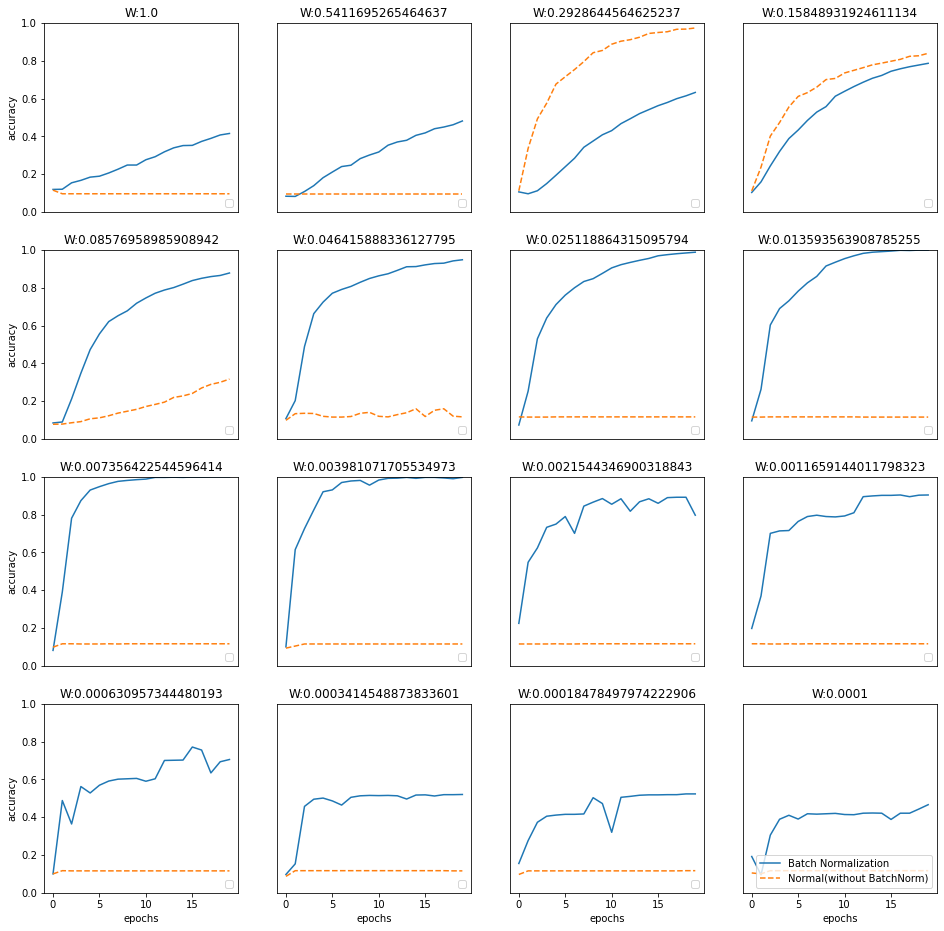

In [21]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.13, test acc:0.1131
epoch:1, train acc:0.15333333333333332, test acc:0.1339
epoch:2, train acc:0.19666666666666666, test acc:0.1453
epoch:3, train acc:0.21666666666666667, test acc:0.1594
epoch:4, train acc:0.23666666666666666, test acc:0.1706
epoch:5, train acc:0.26666666666666666, test acc:0.1734
epoch:6, train acc:0.28, test acc:0.1844
epoch:7, train acc:0.27666666666666667, test acc:0.1913
epoch:8, train acc:0.29333333333333333, test acc:0.2016
epoch:9, train acc:0.33, test acc:0.2212
epoch:10, train acc:0.3433333333333333, test acc:0.2393
epoch:11, train acc:0.35333333333333333, test acc:0.247
epoch:12, train acc:0.39, test acc:0.263
epoch:13, train acc:0.41333333333333333, test acc:0.2788
epoch:14, train acc:0.41333333333333333, test acc:0.28
epoch:15, train acc:0.43333333333333335, test acc:0.2972
epoch:16, train acc:0.45666666666666667, test acc:0.3098
epoch:17, train acc:0.4666666666666667, test acc:0.3138
epoch:18, train acc:0.44666666666666666, test acc:

epoch:161, train acc:0.87, test acc:0.7426
epoch:162, train acc:0.8666666666666667, test acc:0.7413
epoch:163, train acc:0.8733333333333333, test acc:0.7376
epoch:164, train acc:0.8666666666666667, test acc:0.7386
epoch:165, train acc:0.87, test acc:0.7417
epoch:166, train acc:0.86, test acc:0.7391
epoch:167, train acc:0.8733333333333333, test acc:0.738
epoch:168, train acc:0.87, test acc:0.7392
epoch:169, train acc:0.8633333333333333, test acc:0.7386
epoch:170, train acc:0.8666666666666667, test acc:0.7392
epoch:171, train acc:0.87, test acc:0.7362
epoch:172, train acc:0.8833333333333333, test acc:0.7373
epoch:173, train acc:0.8766666666666667, test acc:0.7457
epoch:174, train acc:0.8766666666666667, test acc:0.7455
epoch:175, train acc:0.8733333333333333, test acc:0.7418
epoch:176, train acc:0.8733333333333333, test acc:0.7404
epoch:177, train acc:0.8733333333333333, test acc:0.7406
epoch:178, train acc:0.8766666666666667, test acc:0.7393
epoch:179, train acc:0.8766666666666667, test

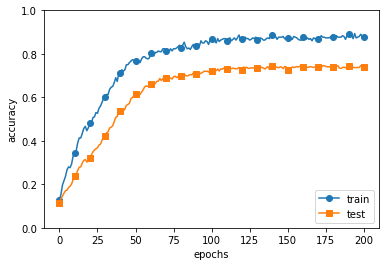

In [23]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

In [34]:
import numpy as np
# x = (600,500)
x = (6,5)
# a,b = x
# print(a,b)
# print(x)
# print(*x)
a = np.random.rand(*x)  # np.random.rand( (6,5) ) =>  np.random.rand( 6, 5 ) 
print(a)
print(np.mean(a))
print(np.max(a))
print(np.min(a))

[[0.1960101  0.36436498 0.89158126 0.2200111  0.353896  ]
 [0.09896038 0.84643392 0.22358441 0.14503699 0.85920215]
 [0.9829832  0.7517729  0.13649226 0.2019894  0.26682898]
 [0.26388407 0.04897072 0.92798489 0.32815471 0.48518613]
 [0.84663969 0.00471146 0.47757309 0.4710258  0.47072269]
 [0.71611823 0.05164176 0.57231527 0.51508777 0.57567244]]
0.4431612250030699
0.9829831950918306
0.004711463811294059


In [51]:
import numpy as np
x = np.arange(1,31).reshape((6,5))
print(x)
print(x.shape)
mask = np.random.rand(*x.shape)
print(mask)
mask = mask > 0.2
print(mask)
print(mask.shape)
# print(np.mean(mask))
# # print(x * mask)
x *= mask
print(x)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
(6, 5)
[[0.61047606 0.92563334 0.56626926 0.20913518 0.54966678]
 [0.4166081  0.90911616 0.20044212 0.28592888 0.03905476]
 [0.1989092  0.94913936 0.51549444 0.40002021 0.79632674]
 [0.73983434 0.73306096 0.1604123  0.05348643 0.88157331]
 [0.81909563 0.02743253 0.88308303 0.78781038 0.00240947]
 [0.97847504 0.55652316 0.87019387 0.73060713 0.02780693]]
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True False False  True]
 [ True False  True  True False]
 [ True  True  True  True False]]
(6, 5)
[[ 1  2  3  4  5]
 [ 6  7  8  9  0]
 [ 0 12 13 14 15]
 [16 17  0  0 20]
 [21  0 23 24  0]
 [26 27 28 29  0]]


train loss:2.3009325173729933
=== epoch:1, train acc:0.11333333333333333, test acc:0.1061 ===
train loss:2.306285192090945
train loss:2.2950411130455266
train loss:2.295682262318246
=== epoch:2, train acc:0.12, test acc:0.1084 ===
train loss:2.3121633683341223
train loss:2.303028472717983
train loss:2.3122468636411364
=== epoch:3, train acc:0.11666666666666667, test acc:0.1113 ===
train loss:2.299748083215491
train loss:2.3012254162919517
train loss:2.306807485980177
=== epoch:4, train acc:0.12, test acc:0.1131 ===
train loss:2.2922713465002302
train loss:2.305563401434971
train loss:2.3009818884858015
=== epoch:5, train acc:0.12333333333333334, test acc:0.1134 ===
train loss:2.3070148168753817
train loss:2.3039777781797914
train loss:2.303614349212656
=== epoch:6, train acc:0.12, test acc:0.1159 ===
train loss:2.305992057030211
train loss:2.3006672868874234
train loss:2.30445828945706
=== epoch:7, train acc:0.13666666666666666, test acc:0.1201 ===
train loss:2.308106938431782
train lo

=== epoch:58, train acc:0.26666666666666666, test acc:0.209 ===
train loss:2.2545184796771762
train loss:2.2575166049381683
train loss:2.2512595183912083
=== epoch:59, train acc:0.2633333333333333, test acc:0.2094 ===
train loss:2.256478743918607
train loss:2.2496587342791705
train loss:2.2460519758907047
=== epoch:60, train acc:0.26666666666666666, test acc:0.2111 ===
train loss:2.2594526479181125
train loss:2.254387424181391
train loss:2.240311155929048
=== epoch:61, train acc:0.27666666666666667, test acc:0.2162 ===
train loss:2.2447785952420407
train loss:2.2552681635707525
train loss:2.2502285825424497
=== epoch:62, train acc:0.27666666666666667, test acc:0.2211 ===
train loss:2.254108982315028
train loss:2.249900527793821
train loss:2.2456476532626346
=== epoch:63, train acc:0.2866666666666667, test acc:0.2212 ===
train loss:2.249266198925431
train loss:2.2391752009411947
train loss:2.260416369008799
=== epoch:64, train acc:0.2833333333333333, test acc:0.2208 ===
train loss:2.234

=== epoch:114, train acc:0.2733333333333333, test acc:0.2293 ===
train loss:2.0904458481223855
train loss:2.0715485070809887
train loss:2.1575593576638066
=== epoch:115, train acc:0.2733333333333333, test acc:0.2327 ===
train loss:2.0973328592050198
train loss:2.1736871197366696
train loss:2.0449617852235256
=== epoch:116, train acc:0.28, test acc:0.2371 ===
train loss:2.1133878973142814
train loss:2.12893468124729
train loss:2.1959973658436294
=== epoch:117, train acc:0.2966666666666667, test acc:0.2463 ===
train loss:2.040125209871955
train loss:2.109551065578584
train loss:2.140343641372169
=== epoch:118, train acc:0.29333333333333333, test acc:0.2447 ===
train loss:2.0559698378966322
train loss:2.112690556544794
train loss:2.1592864082539416
=== epoch:119, train acc:0.29, test acc:0.2462 ===
train loss:2.0531785437310983
train loss:2.1570291263133696
train loss:2.01809941836399
=== epoch:120, train acc:0.2966666666666667, test acc:0.2478 ===
train loss:2.0315764291887053
train loss

=== epoch:170, train acc:0.4, test acc:0.3434 ===
train loss:1.9691043369141108
train loss:1.869357751153985
train loss:1.991276340834765
=== epoch:171, train acc:0.41333333333333333, test acc:0.3423 ===
train loss:1.965154585602343
train loss:1.9571789142556895
train loss:1.8153971010462606
=== epoch:172, train acc:0.4066666666666667, test acc:0.3441 ===
train loss:1.9801244504443638
train loss:1.8540539367432982
train loss:1.8849818400132892
=== epoch:173, train acc:0.41, test acc:0.3425 ===
train loss:1.9419565224914528
train loss:1.9129172394542722
train loss:1.9638323889903881
=== epoch:174, train acc:0.39666666666666667, test acc:0.3423 ===
train loss:1.8899916021207068
train loss:1.8740351312753518
train loss:1.9292244487673542
=== epoch:175, train acc:0.4033333333333333, test acc:0.3473 ===
train loss:1.7919546336940284
train loss:1.8101197920836867
train loss:1.82109081557594
=== epoch:176, train acc:0.4033333333333333, test acc:0.3473 ===
train loss:1.8591350944544416
train l

=== epoch:226, train acc:0.44666666666666666, test acc:0.3816 ===
train loss:1.642387249622611
train loss:1.8065519274158226
train loss:1.7825147494845317
=== epoch:227, train acc:0.4533333333333333, test acc:0.3778 ===
train loss:1.800419563849004
train loss:1.5902010983312422
train loss:1.6793514289188383
=== epoch:228, train acc:0.44666666666666666, test acc:0.3734 ===
train loss:1.7446659690254376
train loss:1.7500683085264896
train loss:1.6455267875091826
=== epoch:229, train acc:0.44666666666666666, test acc:0.3729 ===
train loss:1.811785803291479
train loss:1.7759036214074209
train loss:1.743574526356589
=== epoch:230, train acc:0.43333333333333335, test acc:0.3692 ===
train loss:1.629473249992997
train loss:1.6791547894735959
train loss:1.6937666000844134
=== epoch:231, train acc:0.44666666666666666, test acc:0.3748 ===
train loss:1.6960627088355187
train loss:1.8557920036125952
train loss:1.6672821405055276
=== epoch:232, train acc:0.44, test acc:0.3741 ===
train loss:1.723247

=== epoch:282, train acc:0.55, test acc:0.4511 ===
train loss:1.4172419884045657
train loss:1.4677550538419348
train loss:1.5695490836977735
=== epoch:283, train acc:0.54, test acc:0.4468 ===
train loss:1.4504500950352917
train loss:1.3875334804127066
train loss:1.5245470685882025
=== epoch:284, train acc:0.53, test acc:0.439 ===
train loss:1.634176630783208
train loss:1.4562459203948404
train loss:1.5349138281743178
=== epoch:285, train acc:0.5433333333333333, test acc:0.4475 ===
train loss:1.4878674739821491
train loss:1.5645036144544622
train loss:1.378083531198746
=== epoch:286, train acc:0.5433333333333333, test acc:0.4527 ===
train loss:1.521766543215923
train loss:1.4537546630906744
train loss:1.643318052606769
=== epoch:287, train acc:0.55, test acc:0.4538 ===
train loss:1.4220768121465723
train loss:1.4181708452892483
train loss:1.4631892266773037
=== epoch:288, train acc:0.55, test acc:0.457 ===
train loss:1.3784246079721834
train loss:1.5697784744839414
train loss:1.68002598

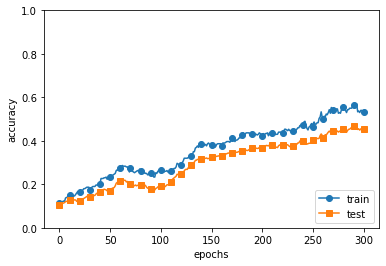

In [54]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0